<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <p style="display: inline-block; padding: 7px; background-color: #B7B7A4; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">-  Spam Email Classification Dataset   -</p>    
<p>
    
               
### <center>📈『XLM-Roberta』👍Simple : LLM - Detect AI Generated Text Dataset </center>
### <center>If you feel my notebook helpful, support with one upvote, thank you</center>
### <center>Created by Mr.Tao  12/11/2023👍</center>
### <center>Updated by Mr.Tao  30/09/2024👍</center>

<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <p style="display: inline-block; padding: 7px; background-color: #B7B7A4; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">-  About Dataset   -</p>    
<p>
    
In this Dataset contains both AI Generated Essay and Human Written Essay for Training Purpose
This dataset challenge is to to develop a machine learning model that can accurately detect whether an essay was written by a student or an LLM. The competition dataset comprises a mix of student-written essays and essays generated by a variety of LLMs.

Dataset contains more than 28,000 essay written by student and AI generated.

 <p style="display: inline-block; padding: 7px; background-color: #B7B7A4; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">-  Features :   -</p>    
<p>
        

text : Which contains essay text
generated : This is label label . 
<p> 0 - Human Written Essay  
<p>   1 - AI Generated Essay
        



<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <h1 style="display: inline-block; padding: 7px; background-color: #B7B7A4; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">-  # Table of Contents   -</h1>    
<p>
    
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Visualization](#3)
- [4. Modeling(XLM-Roberta)](#4)
- [5. Training](#5)
- [6. Model Evaluation](#6)

<a name="1"></a>
# **<h1 id="1" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Import Libraries</h1>**

In [1]:
import numpy as np 
import pandas as pd 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plotter
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
import tensorflow as tf
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# SET GPU 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")  
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:', strategy.num_replicas_in_sync)

In [3]:
import os
os.environ["WANDB_API_KEY"] = "0" 

<a name="2"></a>
# **<h1 id="2" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Read Dataset</h1>**

In [4]:
train_df = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text-dataset/Training_Essay_Data.csv")
train_df.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [5]:
train_df=train_df.rename(columns={'generated': "label"})
train_df.head()

,text,label
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [6]:
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

<a name="3"></a>
# **<h1 id="3" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Visualization</h1>**

### Preprocessing steps
### 1. Check for missing value
### 2. Convert to lowercase
### 3. Remove special characters and punctuation
### 4. Remove extra whitespace
### 5. Remove stop words.


<Figure size 1200x600 with 0 Axes>

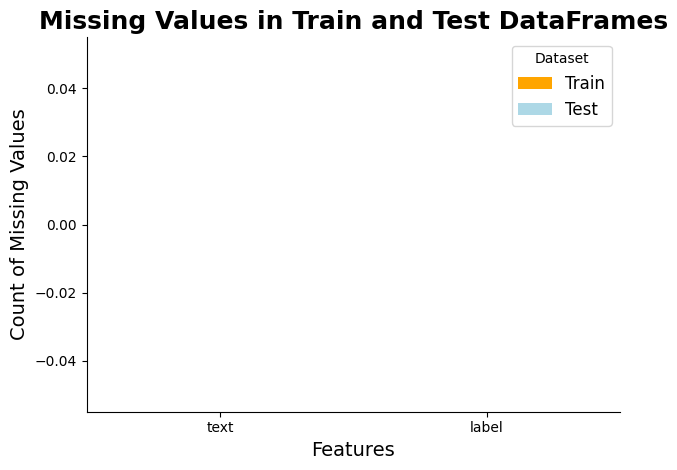

In [7]:
# Check for missing values
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()


missing_values = pd.DataFrame({
    'Train': train_missing,
    'Test': test_missing
}).fillna(0) 

plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color=['orange', 'lightblue'])
plt.title('Missing Values in Train and Test DataFrames', fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Count of Missing Values', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Dataset', fontsize=12)
sns.despine()  
plt.tight_layout()  
plt.show()

In [8]:
#Convert to lowercase
train_df['text'] = train_df['text'].str.lower()
test_df['text'] = test_df['text'].str.lower()

In [9]:
#Remove special characters and punctuation
train_df['text'] = train_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
test_df['text'] = test_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [10]:
#Remove extra whitespace
train_df['text'] = train_df['text'].str.strip()
test_df['text'] = test_df['text'].str.strip()

In [11]:
#Remove stop words.
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

train_df['text'] = train_df['text'].apply(remove_stopwords)                                                
test_df['text'] = test_df['text'].apply(remove_stopwords)                                                  

### Visualization steps
### 1. Visualizing the distribution of the label variable.
### 2. Visualizing the distribution of text lengths.
### 3. Visualizing the relationship between text and the label variable.
### 4. Visualizing the distribution of text lengths for each label category.
### 5. Visualizing the correlation matrix of text lengths.
### 6. Visualizing the word cloud.
### 7. Visualizing word frequency.

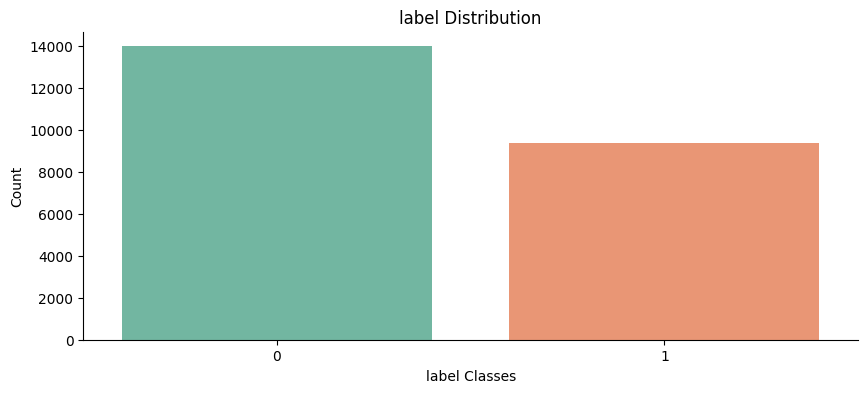

In [12]:
# Visualizing the distribution of the label variable.
plt.figure(figsize=(10, 4))
sns.countplot(x='label', data=train_df, palette='Set2')
plt.title('label Distribution')
plt.xlabel('label Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
sns.despine()
plt.show()

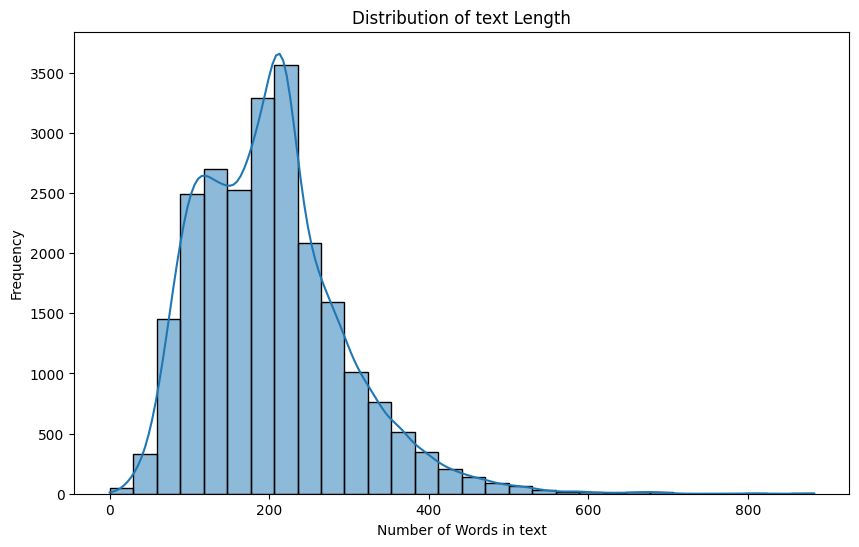

In [13]:
# Visualizing the distribution of text lengths.
train_df['text_length'] = train_df['text'].str.split().str.len()

plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Distribution of text Length')
plt.xlabel('Number of Words in text')
plt.ylabel('Frequency')
plt.show()

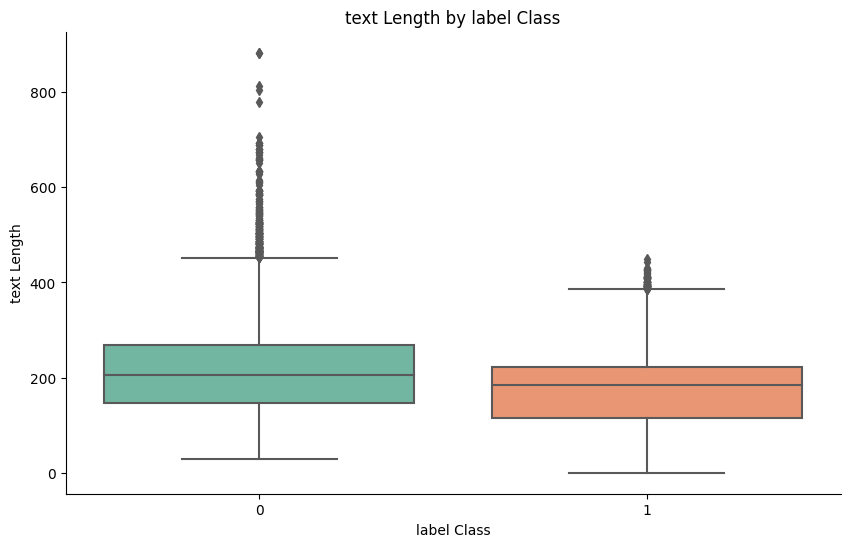

In [14]:
# Visualizing the relationship between text and the label variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=train_df, palette='Set2')
plt.title('text Length by label Class')
plt.xlabel('label Class')
plt.ylabel('text Length')
plt.xticks(rotation=0)
sns.despine()
plt.show()

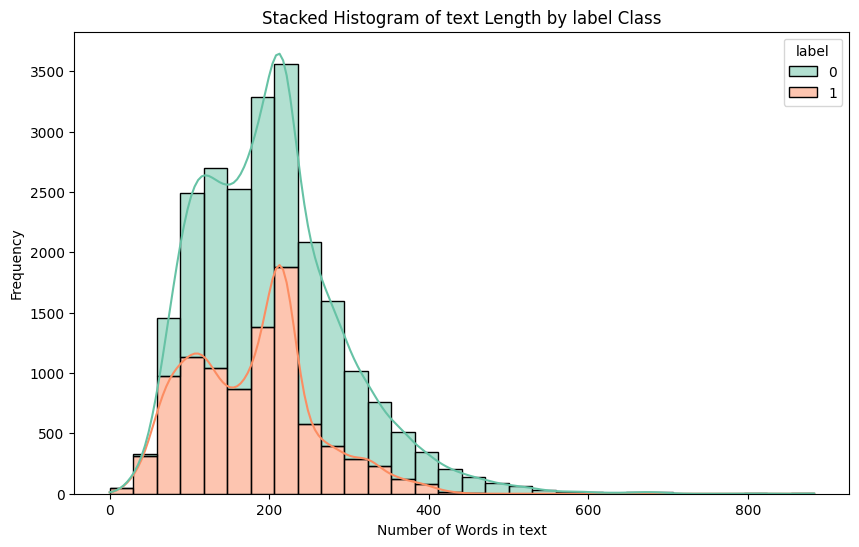

In [15]:
# Visualizing the distribution of text lengths for each label category
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='text_length', hue='label', multiple='stack', bins=30, palette='Set2', kde=True)
plt.title('Stacked Histogram of text Length by label Class')
plt.xlabel('Number of Words in text')  
plt.ylabel('Frequency')
plt.show()

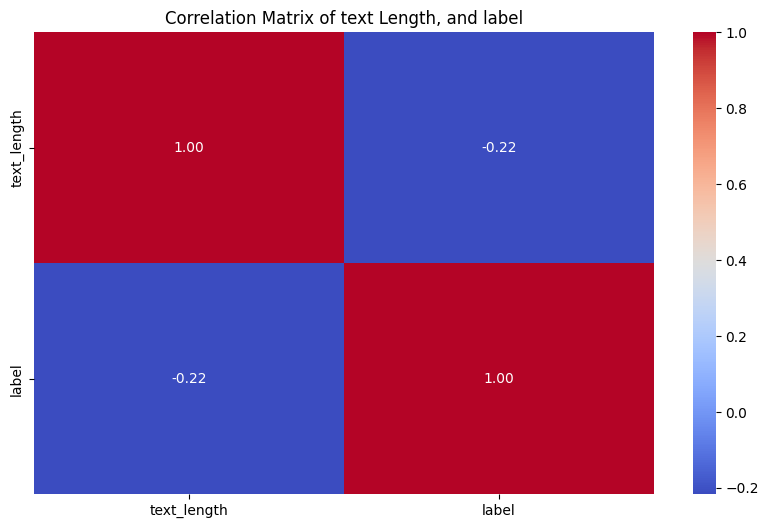

In [16]:
# Visualizing the correlation matrix of text lengths
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[[ 'text_length', 'label']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of text Length, and label')
plt.show()

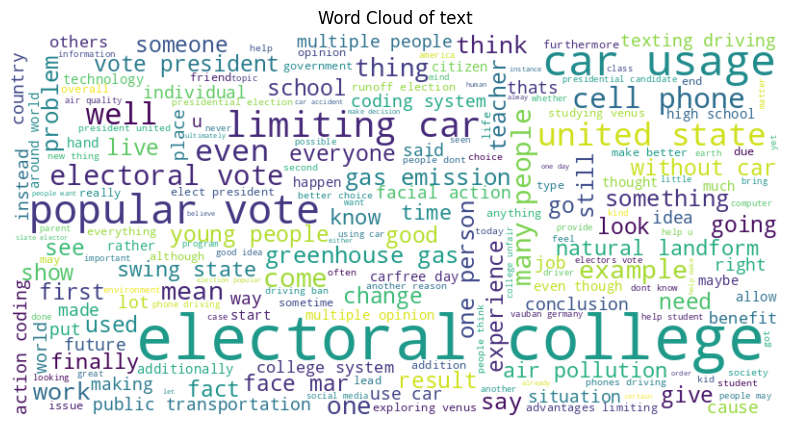

In [17]:
# Visualizing the word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

all_text = ' '.join(train_df['text'].astype(str))

plot_wordcloud(all_text, title='Word Cloud of text')


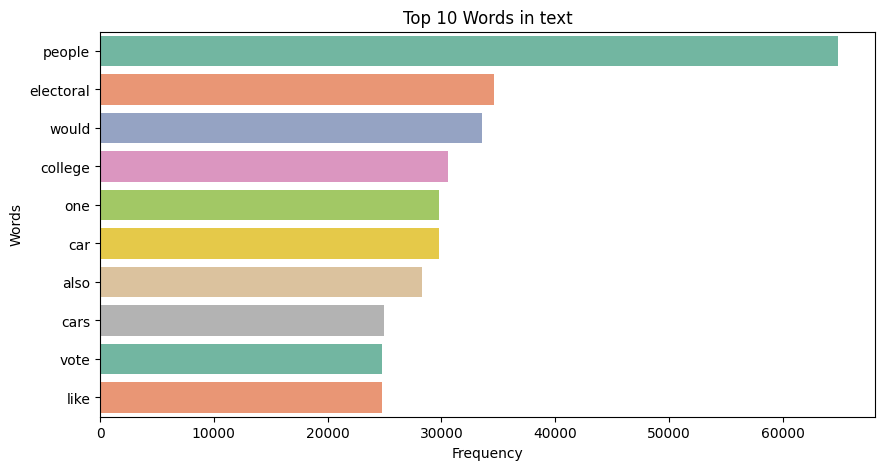

In [18]:
# Visualizing word frequency
def get_word_frequencies(text):
    words = text.split()
    word_counts = Counter(words)  
    return word_counts

text_frequencies = get_word_frequencies(all_text)

text_freq_df = pd.DataFrame(text_frequencies.items(), columns=['Word', 'Frequency'])

top_text_words = text_freq_df.nlargest(10, 'Frequency')

plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=top_text_words, palette='Set2')
plt.title('Top 10 Words in text')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

Data with People Count and Sentiment:
                                                     text  people_count  \
0      scientist nasa believed alien scientists said ...             0   
1      americas love affair vehicles seems cooling sa...             6   
2      great challenge comes exploring planet venus h...             0   
3      cell phones become popular past years almost e...             5   
4      research development dr huang colleague comput...             4   
...                                                  ...           ...   
23311  comes computer games clear cut answer whether ...             0   
23312  smog gas pollution many countries dont allow p...             4   
23313  dear state senator believe something brought a...             2   
23314  seeking multiple opinions making important dec...             1   
23315  better broad knowledge many academic subjects ...             0   

       total_words  sentiment  sentiment_without_people  
0             

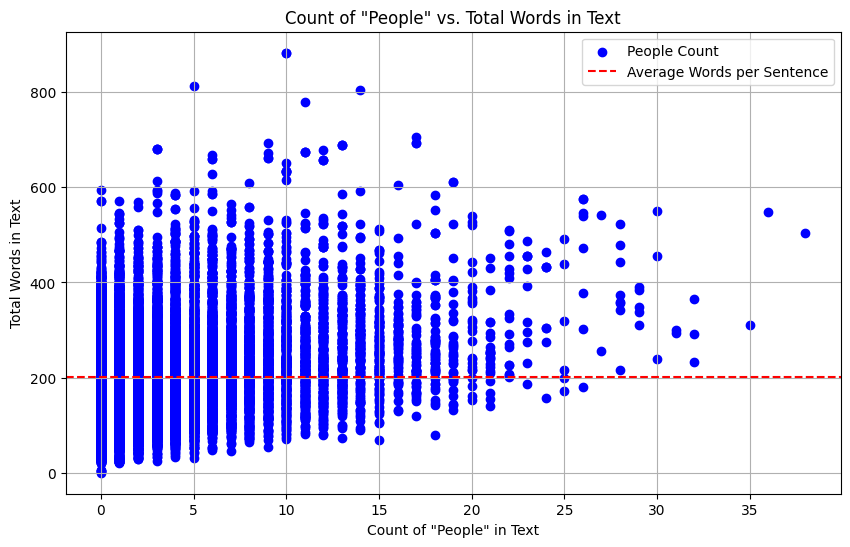

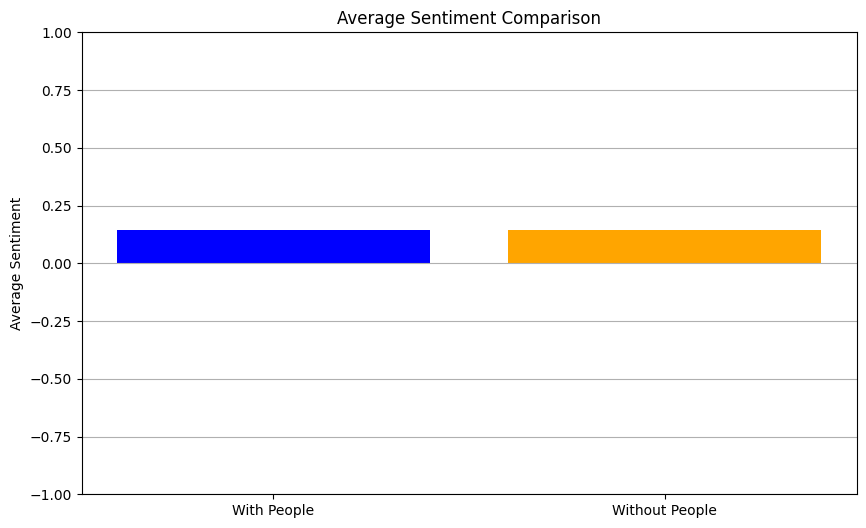

In [19]:
# Sample text data
data = train_df['text']

# Create a DataFrame
df = pd.DataFrame(data)

# Count occurrences of the word 'people'
df['people_count'] = df['text'].str.lower().str.count('people')

# Calculate total word count for each sentence
df['total_words'] = df['text'].apply(lambda x: len(x.split()))

# Calculate sentiment polarity
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Remove 'people' from text and calculate new sentiment
df['text_without_people'] = df['text'].str.replace('people', '', case=False)
df['sentiment_without_people'] = df['text_without_people'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print results
print("Data with People Count and Sentiment:\n", df[['text', 'people_count', 'total_words', 'sentiment', 'sentiment_without_people']])

# Calculate average words per sentence
average_words = df['total_words'].mean()
average_sentiment = df['sentiment'].mean()
average_sentiment_without_people = df['sentiment_without_people'].mean()

print(f"\nAverage words per sentence: {average_words:.2f}")
print(f"Average sentiment (with 'people'): {average_sentiment:.2f}")
print(f"Average sentiment (without 'people'): {average_sentiment_without_people:.2f}")

# Plotting the occurrences of 'people' against total words
plt.figure(figsize=(10, 6))
plt.scatter(df['people_count'], df['total_words'], color='blue', label='People Count')
plt.xlabel('Count of "People" in Text')
plt.ylabel('Total Words in Text')
plt.title('Count of "People" vs. Total Words in Text')
plt.axhline(average_words, color='red', linestyle='--', label='Average Words per Sentence')
plt.legend()
plt.grid()
plt.show()

# Plotting sentiment comparison
plt.figure(figsize=(10, 6))
plt.bar(['With People', 'Without People'], [average_sentiment, average_sentiment_without_people], color=['blue', 'orange'])
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Comparison')
plt.ylim(-1, 1)
plt.grid(axis='y')
plt.show()


In [20]:
#Remove 'people'

train_df['text'] = train_df['text'].str.replace(r'\bpeople\b', '', regex=True)
test_df['text'] = test_df['text'].str.replace(r'\bpeople\b', '', regex=True)

# Optionally, strip extra whitespace
train_df['text'] = train_df['text'].str.strip()
test_df['text'] = test_df['text'].str.strip()

display(train_df['text'].head())
display(test_df['text'].head())


0    scientist nasa believed alien scientists said ...
1    americas love affair vehicles seems cooling sa...
2    great challenge comes exploring planet venus h...
3    cell phones become popular past years almost e...
4    research development dr huang colleague comput...
Name: text, dtype: object

0    would agree emersons world important things co...
1    advice wonderful helpful everyone since  often...
2    think limiting car usage great environment lot...
3    nobody know face got mars never face could jum...
4    student studied lot subjects school stage hesh...
Name: text, dtype: object

<a name="4"></a>
# **<h1 id="4" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Modeling(XLM-Roberta)</h1>**

### Modeling steps
### 1. Import the necessary libraries.
### 2. Delete unnecessary columns.
### 3. Data Processing.
### 4. Tokenizing Text Data for XLM-RoBERTa Model.
### 5. Creating a Data Collator with Padding for Tokenized Inputs.
### 6. Defining a Custom XLM-RoBERTa Model for Classification.
### 7. Setting Up Training Parameters and F1 Score Metric

In [21]:
#Import the necessary libraries.
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

!pip install evaluate -qq

from datasets import Dataset, DatasetDict
import evaluate
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer
import torch.nn as nn
from transformers import XLMRobertaModel
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from datasets import load_metric
from transformers import Trainer
from datasets import Dataset, DatasetDict

In [22]:
# Delete unnecessary columns
train_df = train_df.drop(labels=['text_length'], axis=1)

In [23]:
#Data Processing.

# Split train into train and validation datasets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Convert pandas DataFrames to Hugging Face Datasets
train_ds = Dataset.from_pandas(train_df) 
val_ds = Dataset.from_pandas(val_df)     
test_ds = Dataset.from_pandas(test_df)      

# Create DatasetDict to hold the datasets
ds = DatasetDict()
ds['train'] = train_ds                  
ds['validation'] = val_ds              
ds['test'] = test_ds   

In [24]:
#Tokenizing Text Data for XLM-RoBERTa Model

model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name) 

def tokenizer_sentence(data):
    return tokenizer(data['text'], truncation=True)  #feature columns

tokenized_ds = ds.map(tokenizer_sentence, batched=True)

  0%|          | 0/19 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

In [25]:
#Creating a Data Collator with Padding for Tokenized Inputs
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [26]:
#Defining a Custom XLM-RoBERTa Model for Classification

class CustomXLMRobertaModel(nn.Module):
    def __init__(self, num_labels):
        super(CustomXLMRobertaModel, self).__init__()
        model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
        self.roberta = XLMRobertaModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_labels)
        )
        self.loss = nn.CrossEntropyLoss()
        self.num_labels = num_labels

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        output = self.dropout(output.pooler_output)
        logits = self.classifier(output)

        if labels is not None:
            loss = self.loss(logits.view(-1, self.num_labels), labels.view(-1))
            return {"loss": loss, "logits": logits}
        else:
            return logits
        
model = CustomXLMRobertaModel(num_labels=2)        

Some weights of XLMRobertaModel were not initialized from the model checkpoint at symanto/xlm-roberta-base-snli-mnli-anli-xnli and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
#Setting Up Training Parameters and F1 Score Metric

training_args = TrainingArguments("/content",
                                  optim="adamw_torch",
                                  num_train_epochs=1,
                                  evaluation_strategy="epoch",
                                  logging_dir='./logs',
                                  logging_steps=10,
                                report_to="none")

f1_metric = load_metric("f1")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_metric.compute(predictions=predictions, references=labels, average="micro")
    }

In [28]:
custom_trainer = Trainer(
    model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  
)

In [29]:
!pip install wandb -qq
import os
os.environ["WANDB_DISABLED"] = "false"  


<a name="5"></a>
# **<h1 id="5" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Training</h1>**

In [30]:
print("Training Custom Model...")
custom_trainer.train()
custom_eval_results = custom_trainer.evaluate()

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Training Custom Model...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.001100,0.065031,0.988208,{'f1': 0.9882075471698113}


<a name="6"></a>
# **<h1 id="6" style="background-color:#F0EFEB;font-family:newtimeroman;font-size:150%;color:#283618;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #B7B7A4;">Model Evaluation</h1>**

In [31]:
# Convert evaluation results to a DataFrame for better readability
custom_eval_df = pd.DataFrame(custom_eval_results.items(), columns=['Metric', 'Value'])

# Display the evaluation results
print("Custom Model Evaluation Results:")
custom_eval_df

Custom Model Evaluation Results:


,Metric,Value
0,eval_loss,0.065031
1,eval_accuracy,0.988208
2,eval_f1,{'f1': 0.9882075471698113}
3,eval_runtime,72.7574
4,eval_samples_per_second,64.103
5,eval_steps_per_second,8.013
6,epoch,1.0


In [32]:
# Calculate predictions with the Custom Model
print("Predicting with Custom Model...")
custom_predictions = custom_trainer.predict(tokenized_ds["test"])
custom_logits = torch.from_numpy(custom_predictions.predictions)

Predicting with Custom Model...


In [33]:
# Convert logits to predictions (0 or 1)
custom_test_pred_df = pd.DataFrame(custom_logits)
custom_test_pred_df[0] = (custom_test_pred_df[0] <=  0).astype(int)  
custom_test_pred_df = custom_test_pred_df.rename(columns={0: 'Custom_Test_pred'})

In [34]:
# Merge predictions with test data
custom_test_pred_all = test_df.merge(custom_test_pred_df, how='inner', left_index=True, right_index=True)

Custom Model Test Accuracy: 99.142%
Custom Model Evaluation Accuracy: 98.821%


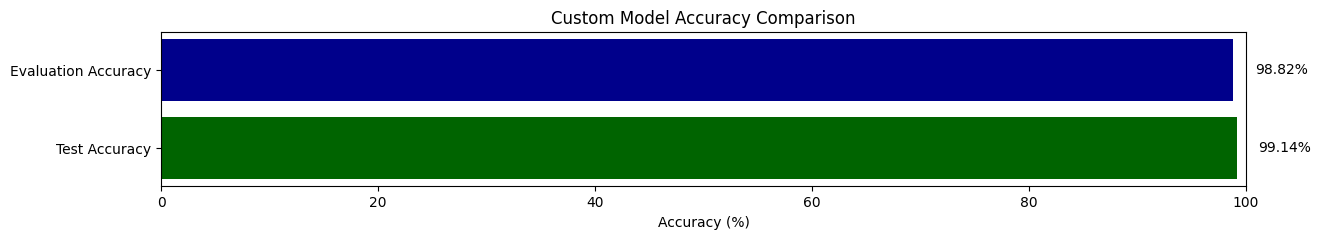

In [35]:
# Calculate accuracy for the Custom Model
custom_acc = accuracy_score(custom_test_pred_all['label'], custom_test_pred_all['Custom_Test_pred'])
print(f"Custom Model Test Accuracy: {custom_acc * 100:.3f}%")

# You can also add evaluation accuracy from the custom_eval_df
eval_acc = None
if 'eval_accuracy' in custom_eval_df['Metric'].values:
    eval_acc = custom_eval_df.loc[custom_eval_df['Metric'] == 'eval_accuracy', 'Value'].values[0]
    print(f"Custom Model Evaluation Accuracy: {eval_acc * 100:.3f}%")

# Prepare data for visualization
accuracy_labels = ['Test Accuracy', 'Evaluation Accuracy']
accuracy_values = [custom_acc * 100, eval_acc * 100] if eval_acc is not None else [custom_acc * 100]

# Create a horizontal bar chart with improved colors
plt.figure(figsize=(14, 2))
colors = ['darkgreen', 'darkblue']  # Green for Test Accuracy, Orange for Evaluation Accuracy
plt.barh(accuracy_labels, accuracy_values, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Custom Model Accuracy Comparison')
plt.xlim(0, 100)  # Set x-axis limit to 0-100%
for i, v in enumerate(accuracy_values):
    plt.text(v + 2, i, f"{v:.2f}%", va='center', color='black')  # Annotate bars with the accuracy values

plt.show()

Custom Model Test Accuracy: 99.142%
Custom Model Evaluation Accuracy: 98.821%


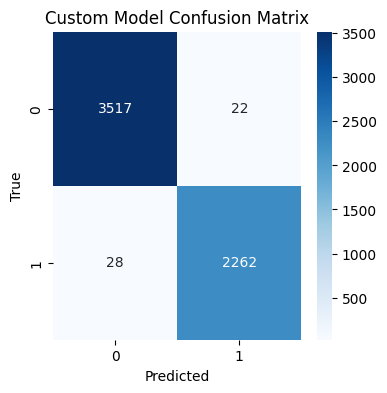

In [36]:
# Calculate accuracy for the Custom Model
custom_acc = accuracy_score(custom_test_pred_all['label'], custom_test_pred_all['Custom_Test_pred'])
print(f"Custom Model Test Accuracy: {custom_acc * 100:.3f}%")

# You can also add evaluation accuracy from the custom_eval_df
if 'eval_accuracy' in custom_eval_df['Metric'].values:
    eval_acc = custom_eval_df.loc[custom_eval_df['Metric'] == 'eval_accuracy', 'Value'].values[0]
    print(f"Custom Model Evaluation Accuracy: {eval_acc * 100:.3f}%")

# Confusion Matrix for the Custom Model
custom_cm = confusion_matrix(custom_test_pred_all['label'], custom_test_pred_all['Custom_Test_pred'])
plt.figure(figsize=(4, 4))
sns.heatmap(custom_cm, annot=True, fmt='.0f', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Custom Model Confusion Matrix")
plt.show()


<Figure size 1000x600 with 0 Axes>

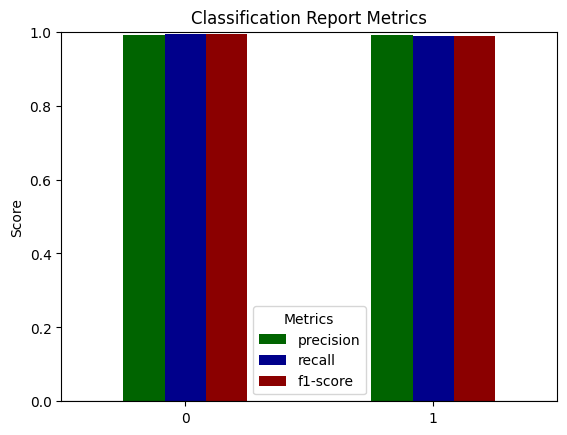

In [37]:
# Generate the classification report
report = classification_report(custom_test_pred_all['label'], custom_test_pred_all['Custom_Test_pred'], output_dict=True)

# Prepare data for visualization
metrics = ['precision', 'recall', 'f1-score']
labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Create a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose().loc[labels, metrics]

# Plotting the Classification Report
plt.figure(figsize=(10, 6))
report_df.plot(kind='bar', color=['darkgreen', 'darkblue', 'darkred'])
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.axhline(0, color='black', linewidth=0.8)
plt.legend(title='Metrics')
plt.show()


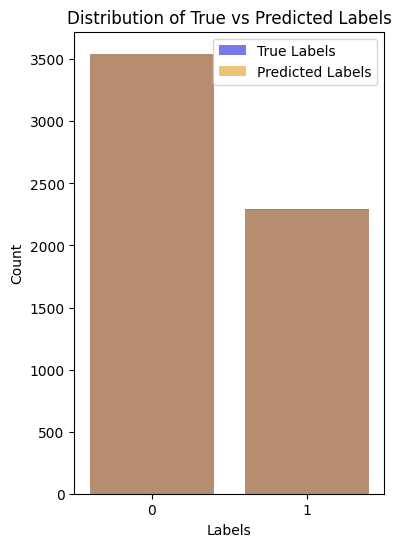

In [38]:
# Plotting the distribution of true vs predicted labels
plt.figure(figsize=(4, 6))
sns.countplot(x='label', data=custom_test_pred_all, alpha=0.6, color='blue', label='True Labels')
sns.countplot(x='Custom_Test_pred', data=custom_test_pred_all, alpha=0.6, color='orange', label='Predicted Labels')
plt.title('Distribution of True vs Predicted Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.legend()
plt.show()


<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#F0EFEB;font-size:110%;text-align:left">
    
 <p style="display: inline-block; padding: 7px; background-color: #B7B7A4; color: #F0EFEB; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #283618; font-family: 'New Times Roman', serif;">-  Plsase upvote , Thank you    -</p>    
<p>
    
               
### <center> I updated this notebook, adding many preprocessing and visualization analysis sections. I hope everyone likes it!</center>
### <center>I'm not in undergrad or for work , just interestand I'm still learning a lot of different ways to do it. </center>
### <center>I hope you'll give me your vote as well as comments to help me improve in the future, thanks!    Mr.Tao👍</center>